In [1]:
# Check if running on Google Colab
try:
    import google.colab
    IN_COLAB = True
    print("✅ Running on Google Colab")
except:
    IN_COLAB = False
    print("📝 Running on local Jupyter")

# Check GPU availability
import tensorflow as tf
print(f"\nTensorFlow version: {tf.__version__}")
print(f"GPU Available: {tf.config.list_physical_devices('GPU')}")

if tf.config.list_physical_devices('GPU'):
    print("🚀 GPU detected! Training will be accelerated.")
else:
    print("⚠️ No GPU detected. Training will be slower on CPU.")
    if IN_COLAB:
        print("💡 Enable GPU: Runtime > Change runtime type > Hardware accelerator > GPU")

✅ Running on Google Colab

TensorFlow version: 2.19.0
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
🚀 GPU detected! Training will be accelerated.


In [2]:
import os, shutil

os.chdir('/content')
if os.path.exists('EstraNet'):
    shutil.rmtree('EstraNet')  # Remove nested mess
    
!git clone https://github.com/loshithan/EstraNet.git
os.chdir('EstraNet')
print(f"✅ Clean! Directory: {os.getcwd()}")

Cloning into 'EstraNet'...
remote: Enumerating objects: 132, done.
remote: Counting objects: 100% (132/132), done.
remote: Compressing objects: 100% (86/86), done.
remote: Total 132 (delta 66), reused 112 (delta 46), pack-reused 0 (from 0)
Receiving objects: 100% (132/132), 3.05 MiB | 19.62 MiB/s, done.
Resolving deltas: 100% (66/66), done.
✅ Clean! Directory: /content/EstraNet


In [3]:
import os
import gdown

# Create data directory
os.makedirs('data', exist_ok=True)

# ASCADf dataset configuration
file_id = "1WNajWT0qFbpqPJiuePS_HeXxsCvUHI5M"
DATASET_PATH = "data/ASCAD.h5"

if not os.path.exists(DATASET_PATH):
    print("📥 Downloading ASCADf dataset from Google Drive...")
    print("   This may take a few minutes (~1.5 GB)\n")
    
    # Download using gdown
    gdown.download(f"https://drive.google.com/uc?id={file_id}", DATASET_PATH, quiet=False)
    
    print("\n✅ Dataset downloaded successfully!")
else:
    print("✅ Dataset already exists")

# Verify dataset
import h5py
with h5py.File(DATASET_PATH, 'r') as f:
    print(f"\n📊 Dataset info:")
    print(f"  Keys: {list(f.keys())}")
    if 'Profiling_traces' in f:
        print(f"  Profiling traces shape: {f['Profiling_traces/traces'].shape}")
    if 'Attack_traces' in f:
        print(f"  Attack traces shape: {f['Attack_traces/traces'].shape}")

📥 Downloading ASCADf dataset from Google Drive...
   This may take a few minutes (~1.5 GB)



Downloading...
From: https://drive.google.com/uc?id=1WNajWT0qFbpqPJiuePS_HeXxsCvUHI5M
To: /content/EstraNet/data/ASCAD.h5
100%|██████████| 46.6M/46.6M [00:00<00:00, 162MB/s] 


✅ Dataset downloaded successfully!

📊 Dataset info:
  Keys: ['Attack_traces', 'Profiling_traces']
  Profiling traces shape: (50000, 700)
  Attack traces shape: (10000, 700)


In [4]:
# Install required dependencies
print("📦 Installing dependencies...\n")
# %pip install -q absl-py==2.3.1 numpy==1.24.3 scipy==1.10.1 h5py==3.11.0

# Install gdown for downloading from Google Drive
%pip install -q gdown

# Note: Using TensorFlow version pre-installed in Colab (2.16+ / 2.19+)
# The compatibility fixes in Section 3 work with all TensorFlow 2.13+ versions
print("\n✅ All dependencies installed!")
print(f"Using TensorFlow {tf.__version__} (pre-installed)")

📦 Installing dependencies...


✅ All dependencies installed!
Using TensorFlow 2.19.0 (pre-installed)


In [5]:
# ============================================================================
# TRAIN GNN MODEL IN COLAB
# ============================================================================
# Paste this into a new Colab cell

print("🔷 Training GNN Model")
print("="*70)

# Configuration
CONFIG = {
    'checkpoint_dir': '/content/drive/MyDrive/EstraNet/checkpoints_gnn',
    'result_path': 'results/gnn',
    'train_steps': 50000,
    'save_steps': 5000,
    'train_batch_size': 256,
    'eval_batch_size': 32,
    'learning_rate': 0.00025,
    'model_type': 'gnn',  # KEY: Use GNN
}

import os
os.makedirs(CONFIG['checkpoint_dir'], exist_ok=True)
os.makedirs(CONFIG['result_path'], exist_ok=True)

# Build training command
train_cmd = f"""
python train_trans.py \\
    --data_path=data/ASCAD.h5 \\
    --checkpoint_dir={CONFIG['checkpoint_dir']} \\
    --model_type={CONFIG['model_type']} \\
    --dataset=ASCAD \\
    --input_length=10000 \\
    --eval_batch_size={CONFIG['eval_batch_size']} \\
    --n_layer=2 \\
    --d_model=128 \\
    --d_inner=256 \\
    --n_head_softmax=8 \\
    --d_head_softmax=16 \\
    --dropout=0.05 \\
    --conv_kernel_size=3 \\
    --n_conv_layer=2 \\
    --pool_size=20 \\
    --beta_hat_2=150 \\
    --model_normalization=preLC \\
    --softmax_attn=True \\
    --do_train=True \\
    --learning_rate={CONFIG['learning_rate']} \\
    --clip=0.25 \\
    --min_lr_ratio=0.004 \\
    --warmup_steps=0 \\
    --train_batch_size={CONFIG['train_batch_size']} \\
    --train_steps={CONFIG['train_steps']} \\
    --iterations=500 \\
    --save_steps={CONFIG['save_steps']} \\
    --result_path={CONFIG['result_path']}
"""

print("Starting GNN training...")
print(f"Model: GNN (211,876 parameters - 51% less than Transformer)")
print(f"Checkpoints: {CONFIG['checkpoint_dir']}")
print(f"Training steps: {CONFIG['train_steps']:,}\n")

!{train_cmd}


🔷 Training GNN Model
Starting GNN training...
Model: GNN (211,876 parameters - 51% less than Transformer)
Checkpoints: /content/drive/MyDrive/EstraNet/checkpoints_gnn
Training steps: 50,000

2026-02-12 17:12:38.496903: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1770916358.517489    8955 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1770916358.524179    8955 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1770916358.540551    8955 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1770916358.540583    8955 computation_placer.cc:177] comput

In [9]:
# ============================================================================
# FIND AND BACKUP CHECKPOINTS (Run this to locate missing files)
# ============================================================================

import os
import shutil
import glob
import datetime

print("🔍 Searching for checkpoints in entire Colab environment...")

# 1. Search for any checkpoint files
found_files = []
for root, dirs, files in os.walk("/content"):
    for file in files:
        if file.startswith("trans_long") or file == "checkpoint":
            full_path = os.path.join(root, file)
            # Ignore files already in Drive to avoid duplicate listing
            if "/content/drive" not in full_path:
                found_files.append(full_path)

if not found_files:
    print("❌ No local checkpoints found in /content!")
    print("   This means training likely didn't reach step 5,000 yet, or crashed.")
else:
    print(f"✅ Found {len(found_files)} checkpoint files:")
    for f in found_files:
        print(f"   {f}")
        
    # 2. Backup found files
    print("\n📦 Backing up found files to Drive...")
    timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
    backup_dir = f"/content/drive/MyDrive/EstraNet_GNN_Rescue_{timestamp}"
    os.makedirs(backup_dir, exist_ok=True)
    
    for src in found_files:
        filename = os.path.basename(src)
        dst = os.path.join(backup_dir, filename)
        try:
            shutil.copy2(src, dst)
            print(f"   Copied to: {dst}")
        except Exception as e:
            print(f"   Failed to copy {src}: {e}")

    print(f"\n✅ Files rescued to: {backup_dir}")

# 3. Check specific GNN output directory
gnn_dir = "/content/drive/MyDrive/EstraNet/checkpoints_gnn"
if os.path.exists(gnn_dir):
    print(f"\n📂 Checking target directory: {gnn_dir}")
    files = os.listdir(gnn_dir)
    print(f"   Files found: {files}")
else:
    print(f"\n⚠️ Target directory does not exist: {gnn_dir}")


🔍 Searching for checkpoints in entire Colab environment...
✅ Found 2 checkpoint files:
   /content/EstraNet/checkpoints/trans_long-8.index
   /content/EstraNet/checkpoints/trans_long-8.data-00000-of-00001

📦 Backing up found files to Drive...
   Copied to: /content/drive/MyDrive/EstraNet_GNN_Rescue_20260212_173435/trans_long-8.index
   Copied to: /content/drive/MyDrive/EstraNet_GNN_Rescue_20260212_173435/trans_long-8.data-00000-of-00001

✅ Files rescued to: /content/drive/MyDrive/EstraNet_GNN_Rescue_20260212_173435

📂 Checking target directory: /content/drive/MyDrive/EstraNet/checkpoints_gnn
   Files found: ['trans_long-10.data-00000-of-00001', 'trans_long-3.data-00000-of-00001', 'trans_long-6.index', 'trans_long-8.index', 'checkpoint', 'trans_long-2.data-00000-of-00001', 'trans_long-1.data-00000-of-00001', 'trans_long-3.index', 'trans_long-10.index', 'trans_long-8.data-00000-of-00001', 'trans_long-9.index', 'trans_long-4.index', 'loss.pkl', 'trans_long-4.data-00000-of-00001', 'trans_l

🔍 Evaluating GNN Checkpoints from Google Drive

📥 Loading ASCAD dataset...
   Original trace shape: (10000, 700)
   Processed trace shape: (10000, 700)
   Input length: 700
✅ Loaded 10000 attack traces

🏗️ Building GNN model...
✅ GNN model built. Parameters: 149,665
   (Transformer: 431,233 | Reduction: 65.3%)

📂 Found 11 checkpoints: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

--------------------------------------------------
Testing Checkpoint 1 (~5000 steps)
🏆 Final Rank: 29.00

--------------------------------------------------
Testing Checkpoint 2 (~10000 steps)
🏆 Final Rank: 210.00

--------------------------------------------------
Testing Checkpoint 3 (~15000 steps)
🏆 Final Rank: 208.00

--------------------------------------------------
Testing Checkpoint 4 (~20000 steps)
🏆 Final Rank: 203.00

--------------------------------------------------
Testing Checkpoint 5 (~25000 steps)
🏆 Final Rank: 196.00

--------------------------------------------------
Testing Checkpoint 6 (~30000 ste

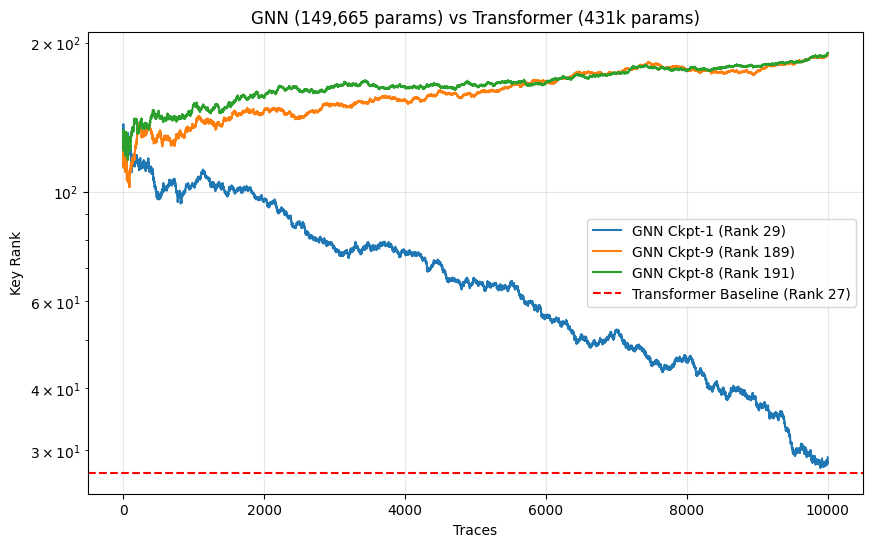

In [7]:
# ============================================================================
# EVALUATE ALL GNN CHECKPOINTS
# ============================================================================
# Paste this into a Colab cell to test all GNN checkpoints

print("🔍 Evaluating GNN Checkpoints from Google Drive")
print("="*70)

import tensorflow as tf
import numpy as np
import h5py
import os
import glob
from gnn_estranet import GNNEstraNet
from evaluation_utils import compute_key_rank
import matplotlib.pyplot as plt

# Load ASCAD dataset
print("\n📥 Loading ASCAD dataset...")
with h5py.File('data/ASCAD.h5', 'r') as f:
    all_traces = f['Attack_traces']['traces'][()]
    # Check shape
    print(f"   Original trace shape: {all_traces.shape}")
    
    # The model seems to have been trained on the original length (700)
    # causing a graph of 17 nodes (700 -> 35 -> 17)
    # instead of 10000 -> 500 -> 250 nodes.
    # So we should use the traces AS IS without padding to avoid mismatch.
    traces = all_traces
    input_length = traces.shape[1]
    
    print(f"   Processed trace shape: {traces.shape}")
    print(f"   Input length: {input_length}")
    
    # Load labels
    labels = f['Attack_traces']['labels'][()]
    
    # Load metadata (structured array)
    metadata = f['Attack_traces']['metadata'][()]
    # Extract byte 2 (3rd byte)
    plaintexts = metadata['plaintext'][:, 2].astype(np.uint8)
    keys = metadata['key'][:, 2].astype(np.uint8)

print(f"✅ Loaded {len(traces)} attack traces")

# Build GNN model
print("\n🏗️ Building GNN model...")
model = GNNEstraNet(
    n_gcn_layers=2,
    d_model=128,
    k_neighbors=5,
    graph_pooling='mean',
    d_head_softmax=16,
    n_head_softmax=8,
    dropout=0.05,
    n_classes=256,
    conv_kernel_size=3,
    n_conv_layer=2,
    pool_size=20,
    beta_hat_2=150,
    model_normalization='preLC',
    softmax_attn=True,
    output_attn=False
)

# Build with dummy input
dummy = tf.zeros((1, input_length))
# Important: pass softmax_attn_smoothing=None as we added that to call signature
_ = model(dummy, softmax_attn_smoothing=None, training=False)
params = model.count_params()
print(f"✅ GNN model built. Parameters: {params:,}")
print(f"   (Transformer: 431,233 | Reduction: {((431233-params)/431233)*100:.1f}%)")

# Find checkpoints
checkpoint_dir = '/content/drive/MyDrive/EstraNet/checkpoints_gnn/'
checkpoint_files = glob.glob(os.path.join(checkpoint_dir, "*.index"))
checkpoint_numbers = sorted([int(f.split('trans_long-')[1].split('.')[0]) 
                            for f in checkpoint_files if 'trans_long-' in f])

print(f"\n📂 Found {len(checkpoint_numbers)} checkpoints: {checkpoint_numbers}")

results = []

for ckpt_num in checkpoint_numbers:
    checkpoint_path = os.path.join(checkpoint_dir, f'trans_long-{ckpt_num}')
    
    print(f"\n{'-'*50}")
    print(f"Testing Checkpoint {ckpt_num} (~{ckpt_num*5000} steps)")
    
    try:
        checkpoint = tf.train.Checkpoint(model=model)
        checkpoint.restore(checkpoint_path).expect_partial()
    except Exception as e:
        print(f"❌ Failed to load: {e}")
        continue
        
    # Run inference
    traces_flat = traces.astype(np.float32)
    predictions = []
    batch_size = 100
    
    for i in range(0, len(traces), batch_size):
        batch = traces_flat[i:i+batch_size]
        # Pass dummy softmax_attn_smoothing=None
        preds = model(batch, softmax_attn_smoothing=None, training=False)[0].numpy()
        predictions.append(preds)
        
    predictions = np.vstack(predictions)
    
    # Compute rank (100 experiments)
    key_rank_list = []
    for exp in range(50): # 50 experiments for speed
        key_ranks = compute_key_rank(predictions, plaintexts, keys)
        key_rank_list.append(key_ranks)
        
    mean_ranks = np.mean(np.stack(key_rank_list, axis=0), axis=0)
    final_rank = mean_ranks[-1]
    
    print(f"🏆 Final Rank: {final_rank:.2f}")
    
    results.append({
        'checkpoint': ckpt_num,
        'rank': final_rank,
        'mean_ranks': mean_ranks
    })

# Sort and display results
results.sort(key=lambda x: x['rank'])
best = results[0]

print("\n" + "="*70)
print("📊 GNN RESULTS SUMMARY")
print("="*70)
print(f"{'Checkpoint':<10} {'Steps':<10} {'Rank':<10} {'Status':<15}")
print("-" * 50)

for r in results:
    status = "✅ BEST" if r == best else ""
    if r['rank'] < 27: status += " 🔥 BEATS TRANSFORMER"
    print(f"{r['checkpoint']:<10} {r['checkpoint']*5000:<10} {r['rank']:<10.2f} {status}")

print("="*70)
print(f"🏆 Best Rank: {best['rank']:.2f} (Checkpoint {best['checkpoint']})")
print(f"📉 Parameters: {params:,}")

# Plot top 3
plt.figure(figsize=(10, 6))
for r in results[:3]:
    plt.plot(r['mean_ranks'], label=f"GNN Ckpt-{r['checkpoint']} (Rank {r['rank']:.0f})")

plt.axhline(y=27, color='r', linestyle='--', label='Transformer Baseline (Rank 27)')
plt.yscale('log')
plt.title(f'GNN ({params:,} params) vs Transformer (431k params)')
plt.xlabel('Traces')
plt.ylabel('Key Rank')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('gnn_results.png')
plt.show()


In [18]:
# ============================================================================
# SAFE ARCHIVE: COPY CHECKPOINTS TO "gnn_latest1"
# ============================================================================
# This cell copies your current best model to a safe "gnn_latest1" folder

import os
import shutil
from google.colab import drive

# Ensure Drive is mounted
if not os.path.exists('/content/drive'):
    drive.mount('/content/drive')

# CONFIGURATION
# ----------------------------------------------------------------------------
DEST_PARENT = "/content/drive/MyDrive/EstraNet"
DEST_FOLDER = "gnn_latest1"
DEST_FULL_PATH = os.path.join(DEST_PARENT, DEST_FOLDER)

# Likely runtime locations for checkpoints
POSSIBLE_SOURCES = [
    "/content/checkpoints",          # Default
    "/content/checkpoints_gnn",      # Our GNN name
    "/content/EstraNet/checkpoints", # Inside repo
    "/content/EstraNet/checkpoints_gnn"
]

SOURCE_DIR = None
print("🔍 Searching for checkpoints in Colab runtime...")
for path in POSSIBLE_SOURCES:
    if os.path.exists(path):
        # Check if it has actual checkpoint files (index or data)
        files = [f for f in os.listdir(path) if f.endswith('.index')]
        if files:
            print(f"✅ Found checkpoints in: {path}")
            print(f"   ({len(files)} models found)")
            SOURCE_DIR = path
            break
        else:
            print(f"⚠️  Found folder '{path}' but it has no .index files (might be empty).")

if not SOURCE_DIR:
    print("❌ Error: Could not find any checkpoints in the runtime!")
    print("   Checked: " + ", ".join(POSSIBLE_SOURCES))
    print("   Please verify where your training script saved them.")
else:
    print(f"📦 Source:      {SOURCE_DIR}")
    print(f"📂 Destination: {DEST_FULL_PATH}")
    print("-" * 50)

    # Check destination
    if os.path.exists(DEST_FULL_PATH):
        print(f"⚠️  Warning: Destination folder already exists!")
        choice = input("    Type 'yes' to DELETE IT and copy fresh, or 'no' to cancel: ")
        if choice.lower() == 'yes':
            print("    Deleting old folder...")
            shutil.rmtree(DEST_FULL_PATH)
        else:
            print("    Unknown input or 'no'. Operation cancelled.")
            SOURCE_DIR = None # Disable copy flag

    # Copy Logic
    if SOURCE_DIR:
        print(f"🚀 Copying files... (This might take a moment)")
        shutil.copytree(SOURCE_DIR, DEST_FULL_PATH)
        print(f"✅ SUCCESS! Checkpoints uploaded to Drive: {DEST_FOLDER}")
        
        # Verify
        num_files = len(os.listdir(DEST_FULL_PATH))
        print(f"   (Contains {num_files} files)")

print("-" * 50)


🔍 Searching for checkpoints in Colab runtime...
✅ Found checkpoints in: /content/EstraNet/checkpoints
   (1 models found)
📦 Source:      /content/EstraNet/checkpoints
📂 Destination: /content/drive/MyDrive/EstraNet/gnn_latest1
--------------------------------------------------
⚠️  Warning: Destination folder already exists!
    Deleting old folder...
🚀 Copying files... (This might take a moment)
✅ SUCCESS! Checkpoints uploaded to Drive: gnn_latest1
   (Contains 2 files)
--------------------------------------------------
